In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [150]:
df1=pd.read_csv("Entities.csv")
df1.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [151]:
df1.shape

(168446, 18)

In [152]:
df1.purpose.unique()

array(['For Sale', 'For Rent'], dtype=object)

In [153]:
df1[df1.purpose=="For Rent"].head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
35,35,858689,3190,https://www.zameen.com/Property/dha_defence_ph...,House,110000,DHA Defence,Islamabad,Islamabad Capital,33.542039,73.093414,5,For Rent,5,10/20/2018,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,5445.000
36,36,877435,165,https://www.zameen.com/Property/islamabad_f_7_...,House,600000,F-7,Islamabad,Islamabad Capital,33.720413,73.056493,6,For Rent,6,10/20/2018,Nexus Estate Services,Ch Afzal/ Ch Faisal/ Ch Adeel,10890.000
37,37,981663,3349,https://www.zameen.com/Property/g_15_g_15_2_g_...,Lower Portion,33000,G-15,Islamabad,Islamabad Capital,33.633416,72.918220,2,For Rent,2,10/20/2018,NaN,NaN,2178.008
38,38,1838236,1378,https://www.zameen.com/Property/islamabad_paki...,House,45000,Pakistan Town,Islamabad,Islamabad Capital,33.575405,73.143325,5,For Rent,3,7/11/2019,NaN,NaN,65340.000
39,39,1871937,156,https://www.zameen.com/Property/islamabad_bhar...,Upper Portion,12000,Bhara kahu,Islamabad,Islamabad Capital,33.737402,73.179159,2,For Rent,2,2/4/2019,NaN,NaN,1361.255


In [154]:
df2 = df1.drop(df1[df1['purpose'] == "For Rent"].index)

In [155]:
df2.shape

(120655, 18)

In [156]:
df3=df2.drop(['property_id','location_id','page_url','latitude','longitude','date_added','agency','agent'],axis=1)

In [157]:
df3.head()

,Unnamed: 0,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
0,0,Flat,10000000,G-10,Islamabad,Islamabad Capital,2,For Sale,2,1089.004
1,1,Flat,6900000,E-11,Islamabad,Islamabad Capital,3,For Sale,3,15246.056
2,2,House,16500000,G-15,Islamabad,Islamabad Capital,6,For Sale,5,2178.008
3,3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,4,For Sale,4,10890.000
4,4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,3,For Sale,3,2178.008


In [158]:
df3.purpose.unique()

array(['For Sale'], dtype=object)

In [159]:
df4=df3.drop(['Unnamed: 0','purpose','province_name'],axis=1)
df4

,property_type,price,location,city,baths,bedrooms,Total_Area
0,Flat,10000000,G-10,Islamabad,2,2,1089.004
1,Flat,6900000,E-11,Islamabad,3,3,15246.056
2,House,16500000,G-15,Islamabad,6,5,2178.008
3,House,43500000,Bani Gala,Islamabad,4,4,10890.000
4,House,7000000,DHA Defence,Islamabad,3,3,2178.008
...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,0,6,26136.096
168442,House,12500000,Gadap Town,Karachi,0,3,2178.008
168443,House,27000000,Gadap Town,Karachi,0,6,26136.096
168444,House,11000000,Gadap Town,Karachi,0,3,21235.578


In [160]:
df4.property_type.unique()

array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
       'Upper Portion', 'Room'], dtype=object)

In [161]:
df4.city.unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [162]:
df4.isna().sum()

property_type    0
price            0
location         0
city             0
baths            0
bedrooms         0
Total_Area       0
dtype: int64

In [163]:
df4.baths.unique()

array([  2,   3,   6,   4,   8,   7,   5,   0,   1,  10,   9,  11,  13,
        12, 403,  14], dtype=int64)

In [164]:
df4.bedrooms.unique()

array([ 2,  3,  5,  4,  8,  7,  0,  1,  6, 10, 12, 11,  9, 14, 15, 16, 13,
       18, 25, 27], dtype=int64)

In [165]:
df4[df4.bedrooms==0].shape

(13119, 7)

In [166]:
df5=df4.drop(df4[df4['bedrooms'] == 0].index)

In [167]:
df5[df5.baths>(df5.bedrooms+3)]

,property_type,price,location,city,baths,bedrooms,Total_Area
596,Flat,15000000,DHA Defence,Islamabad,8,4,3267.012
2752,House,51000000,Gulberg,Lahore,10,5,5445.000
3000,House,20000000,Lasani Garden,Faisalabad,8,4,1633.506
3775,House,95000000,Cantt,Karachi,10,6,59895.000
4384,House,8500000,Taj Bagh Scheme,Lahore,7,2,1633.506
...,...,...,...,...,...,...,...
151934,House,28500000,Gulshan-e-Iqbal Town,Karachi,6,2,1633.506
159721,House,250000,G-14,Islamabad,14,10,81675.000
161541,House,27500000,Scheme 33,Karachi,9,5,26136.096
162777,Flat,540000,Gadap Town,Karachi,6,2,7623.028


In [168]:
df6=df5.drop(df5[df5.baths > (df5.bedrooms+2)].index)
df6

,property_type,price,location,city,baths,bedrooms,Total_Area
0,Flat,10000000,G-10,Islamabad,2,2,1089.004
1,Flat,6900000,E-11,Islamabad,3,3,15246.056
2,House,16500000,G-15,Islamabad,6,5,2178.008
3,House,43500000,Bani Gala,Islamabad,4,4,10890.000
4,House,7000000,DHA Defence,Islamabad,3,3,2178.008
...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,0,6,26136.096
168442,House,12500000,Gadap Town,Karachi,0,3,2178.008
168443,House,27000000,Gadap Town,Karachi,0,6,26136.096
168444,House,11000000,Gadap Town,Karachi,0,3,21235.578


In [169]:
df6[df6.baths==0].shape

(14769, 7)

In [170]:
df6.groupby('city')['baths'].apply(lambda x: (x == 0).sum())

city
Faisalabad     452
Islamabad     1558
Karachi       5814
Lahore        5357
Rawalpindi    1588
Name: baths, dtype: int64

In [171]:
df7=df6.drop(df6[df6['baths'] == 0].index)
df7.shape

(92363, 7)

In [172]:
df7.groupby('city').count()

,property_type,price,location,baths,bedrooms,Total_Area
city,,,,,,
Faisalabad,1758,1758,1758,1758,1758,1758
Islamabad,12215,12215,12215,12215,12215,12215
Karachi,36213,36213,36213,36213,36213,36213
Lahore,33960,33960,33960,33960,33960,33960
Rawalpindi,8217,8217,8217,8217,8217,8217


In [173]:
df7

,property_type,price,location,city,baths,bedrooms,Total_Area
0,Flat,10000000,G-10,Islamabad,2,2,1089.004
1,Flat,6900000,E-11,Islamabad,3,3,15246.056
2,House,16500000,G-15,Islamabad,6,5,2178.008
3,House,43500000,Bani Gala,Islamabad,4,4,10890.000
4,House,7000000,DHA Defence,Islamabad,3,3,2178.008
...,...,...,...,...,...,...,...
168436,House,8800000,Bahria Town Karachi,Karachi,4,3,2178.008
168437,House,5000000,Bahria Town Karachi,Karachi,4,3,1361.255
168438,House,14000000,Bahria Town Karachi,Karachi,3,3,2178.008
168439,House,14000000,Bahria Town Karachi,Karachi,4,4,3811.514


In [174]:
df7=df7.drop(df7[df7['Total_Area'] == 0].index)

In [175]:
df7[df7.Total_Area/df7.bedrooms<300]

,property_type,price,location,city,baths,bedrooms,Total_Area
25,House,6800000,Koral Town,Islamabad,4,4,1089.004
68,House,3200000,Chungi Amar Sadhu,Lahore,2,3,816.753
118,House,5000000,Chakri Road,Rawalpindi,5,6,1361.255
161,House,32000000,DHA Defence,Karachi,4,4,1089.004
293,House,6000000,Allama Iqbal Town,Lahore,2,3,544.502
...,...,...,...,...,...,...,...
168190,House,16500000,Johar Town,Lahore,6,5,1361.255
168255,House,16500000,Johar Town,Lahore,6,5,1361.255
168297,House,42500000,North Nazimabad,Karachi,4,9,2178.008
168385,House,165000000,DHA Defence,Lahore,6,6,1089.004


In [176]:
df7['Price_per_Area']=df7.price/df7.Total_Area

In [177]:
df7

,property_type,price,location,city,baths,bedrooms,Total_Area,Price_per_Area
0,Flat,10000000,G-10,Islamabad,2,2,1089.004,9182.702727
1,Flat,6900000,E-11,Islamabad,3,3,15246.056,452.576063
2,House,16500000,G-15,Islamabad,6,5,2178.008,7575.729749
3,House,43500000,Bani Gala,Islamabad,4,4,10890.000,3994.490358
4,House,7000000,DHA Defence,Islamabad,3,3,2178.008,3213.945954
...,...,...,...,...,...,...,...,...
168436,House,8800000,Bahria Town Karachi,Karachi,4,3,2178.008,4040.389200
168437,House,5000000,Bahria Town Karachi,Karachi,4,3,1361.255,3673.081091
168438,House,14000000,Bahria Town Karachi,Karachi,3,3,2178.008,6427.891909
168439,House,14000000,Bahria Town Karachi,Karachi,4,4,3811.514,3673.081091


In [178]:
df7.describe()

,price,baths,bedrooms,Total_Area,Price_per_Area
count,9.235500e+04,92355.000000,92355.00000,9.235500e+04,92355.000000
mean,2.437468e+07,3.980467,3.80772,1.132785e+04,5874.602844
std,3.687745e+07,1.749705,1.58605,3.336079e+05,6211.145575
min,1.000000e+00,1.000000,1.00000,2.722510e+02,0.000077
25%,7.500000e+06,3.000000,3.00000,1.633506e+03,935.596127
50%,1.400000e+07,4.000000,3.00000,3.811514e+03,5785.123967
75%,2.600000e+07,5.000000,5.00000,1.143454e+04,8494.031221
max,2.000000e+09,12.000000,16.00000,9.377379e+07,550962.163592


In [179]:
def remove_ppa_outlier(df):
    df_final=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.Price_per_Area)
        st=np.std(subdf.Price_per_Area)
        reduce_df=subdf[(subdf.Price_per_Area>(m-st))&(subdf.Price_per_Area<=(m+st))]
        df_final=pd.concat([df_final,reduce_df],ignore_index=True)
    return df_final

In [180]:
df8=remove_ppa_outlier(df7)
df8.shape

(71905, 8)

In [181]:
df8.describe()

,price,baths,bedrooms,Total_Area,Price_per_Area
count,7.190500e+04,71905.000000,71905.000000,7.190500e+04,71905.000000
mean,2.309087e+07,4.014477,3.809040,9.174247e+03,5367.546904
std,3.185009e+07,1.716873,1.524577,2.494176e+04,4136.185168
min,1.000000e+00,1.000000,1.000000,2.722510e+02,0.000077
25%,7.800000e+06,3.000000,3.000000,1.633506e+03,1071.319253
50%,1.400000e+07,4.000000,4.000000,3.267012e+03,5693.275690
75%,2.550000e+07,5.000000,5.000000,1.143454e+04,8080.778399
max,1.450000e+09,12.000000,16.000000,2.586375e+06,49848.957658


In [182]:
df8.groupby(['property_type','city']).count()

price  location  baths  bedrooms  Total_Area  \
property_type city                                                       
Farm House    Islamabad      37        37     37        37          37   
              Karachi        22        22     22        22          22   
              Lahore         69        69     69        69          69   
              Rawalpindi      4         4      4         4           4   
Flat          Faisalabad      5         5      5         5           5   
              Islamabad    2116      2116   2116      2116        2116   
              Karachi     14286     14286  14286     14286       14286   
              Lahore        828       828    828       828         828   
              Rawalpindi    225       225    225       225         225   
House         Faisalabad   1135      1135   1135      1135        1135   
              Islamabad    6466      6466   6466      6466        6466   
              Karachi     10758     10758  10758     10758       10758   
              Lahore      27673     27673  27673     27673       27673   
              Rawalpindi   5821      5821   5821      5821        5821   
Lower Portion Faisalabad      1         1      1         1           1   
              Islamabad       2         2      2         2           2   
              Karachi       578       578    578       578         578   
              Lahore         28        28     28        28          28   
              Rawalpindi      1         1      1         1           1   
Penthouse     Islamabad      14        14     14        14          14   
              Karachi       165       165    165       165         165   
              Lahore          5         5      5         5           5   
              Rawalpindi      2         2      2         2           2   
Room          Islamabad       4         4      4         4           4   
              Karachi         3         3      3         3           3   
              Lahore          3         3      3         3           3   
Upper Portion Faisalabad      1         1      1         1           1   
              Islamabad       4         4      4         4           4   
              Karachi      1619      1619   1619      1619        1619   
              Lahore         26        26     26        26          26   
              Rawalpindi      4         4      4         4           4   

                          Price_per_Area  
property_type city                        
Farm House    Islamabad               37  
              Karachi                 22  
              Lahore                  69  
              Rawalpindi               4  
Flat          Faisalabad               5  
              Islamabad             2116  
              Karachi              14286  
              Lahore                 828  
              Rawalpindi             225  
House         Faisalabad            1135  
              Islamabad             6466  
              Karachi              10758  
              Lahore               27673  
              Rawalpindi            5821  
Lower Portion Faisalabad               1  
              Islamabad                2  
              Karachi                578  
              Lahore                  28  
              Rawalpindi               1  
Penthouse     Islamabad               14  
              Karachi                165  
              Lahore                   5  
              Rawalpindi               2  
Room          Islamabad                4  
              Karachi                  3  
              Lahore                   3  
Upper Portion Faisalabad               1  
              Islamabad                4  
              Karachi               1619  
              Lahore                  26  
              Rawalpindi               4

In [183]:
df9 = df8[(df8['property_type'] == 'House') & (df8['city'] =='Lahore')]
df9.shape

(27673, 8)

In [184]:
df9.describe()

,price,baths,bedrooms,Total_Area,Price_per_Area
count,2.767300e+04,27673.000000,27673.000000,2.767300e+04,27673.000000
mean,2.592375e+07,4.652441,4.179381,4.256581e+03,7902.333554
std,2.709288e+07,1.487628,1.209537,2.631354e+04,2509.703119
min,4.000000e+05,1.000000,1.000000,2.722510e+02,1.836547
25%,1.070000e+07,3.000000,3.000000,1.361255e+03,6464.622719
50%,1.850000e+07,5.000000,4.000000,2.722510e+03,7870.888051
75%,3.400000e+07,6.000000,5.000000,5.445000e+03,9182.702727
max,7.000000e+08,12.000000,11.000000,2.586375e+06,22956.756816


In [185]:
df9

,property_type,price,location,city,baths,bedrooms,Total_Area,Price_per_Area
17,House,11000000,AWT Army Welfare Trust,Lahore,4,4,2722.510,4040.389200
18,House,19000000,AWT Army Welfare Trust,Lahore,4,3,5445.000,3489.439853
19,House,5000000,AWT Army Welfare Trust,Lahore,2,3,1361.255,3673.081091
20,House,21000000,AWT Army Welfare Trust,Lahore,6,5,5445.000,3856.749311
21,House,11000000,AWT Army Welfare Trust,Lahore,5,5,2722.510,4040.389200
...,...,...,...,...,...,...,...,...
71898,House,25000000,Zubaida Park,Lahore,4,5,2722.510,9182.702727
71899,House,30000000,Zubaida Park,Lahore,4,4,5445.000,5509.641873
71900,House,4500000,Zubaida Park,Lahore,3,3,544.502,8264.432454
71901,House,20000000,Zubaida Park,Lahore,3,5,2722.510,7346.162181


In [191]:
df9.groupby('location').count()

,property_type,price,city,baths,bedrooms,Total_Area,Price_per_Area
location,,,,,,,
AWT Army Welfare Trust,7,7,7,7,7,7,7
Aabpara Coop Housing Society,1,1,1,1,1,1,1
Aashiana Road,71,71,71,71,71,71,71
Abdali Road,6,6,6,6,6,6,6
Abdalians Cooperative Housing Society,43,43,43,43,43,43,43
...,...,...,...,...,...,...,...
Youhanabad,3,3,3,3,3,3,3
Zaheer Villas,30,30,30,30,30,30,30
Zaitoon - New Lahore City,23,23,23,23,23,23,23


In [207]:
df9=df9[df9['Price_per_Area']>5000]

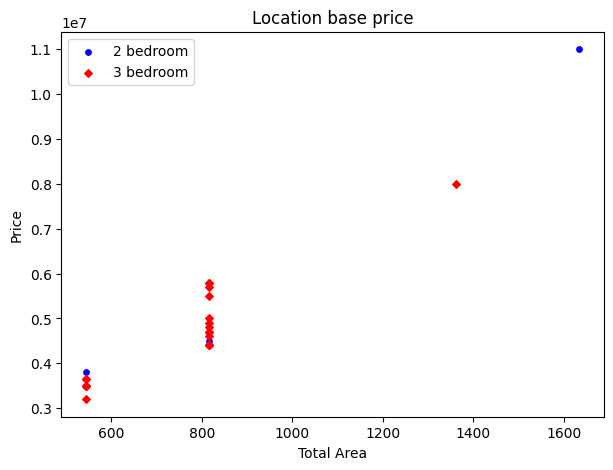

In [220]:
import matplotlib
def plot_scatter_chart(df,location):
    b1=df[(df.location==location)&(df.bedrooms==2)]
    b2=df[(df.location==location)&(df.bedrooms==3)]
    matplotlib.rcParams['figure.figsize']=(7,5)
    plt.scatter(b1.Total_Area,b1.price, color="blue", label="2 bedroom",s=15)
    plt.scatter(b2.Total_Area,b2.price, color="red",marker="D", label="3 bedroom",s=15)
    plt.xlabel("Total Area")
    plt.ylabel("Price")
    plt.title("Location base price")
    plt.legend()
    
plot_scatter_chart(df9,"Aashiana Road")

In [221]:
def remove_lowPrice_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        b_stats={}
        for b, b_df in location_df.groupby('bedrooms'):
            b_stats[b]={
                'mean':np.mean(b_df.Price_per_Area),
                'std':np.std(b_df.Price_per_Area),
                'count':b_df.shape[0]
            }
        for b, b_df in location_df.groupby('bedrooms'):
            stats=b_stats.get(b-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices, b_df[b_df.Price_per_Area<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [222]:
df10=remove_lowPrice_outliers(df9)
df10.shape

(15152, 8)

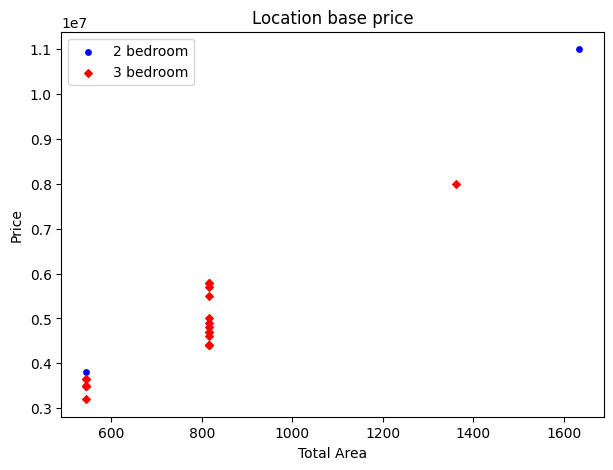

In [223]:
plot_scatter_chart(df10,"Aashiana Road")

In [224]:
df10.describe()

,price,baths,bedrooms,Total_Area,Price_per_Area
count,1.515200e+04,15152.000000,15152.000000,15152.000000,15152.000000
mean,2.448904e+07,4.403709,3.963701,2550.031309,8922.246247
std,3.001235e+07,1.432979,1.244671,2622.316223,2247.722684
min,1.950000e+06,1.000000,1.000000,272.251000,5008.746942
25%,1.000000e+07,3.000000,3.000000,1361.255000,7493.085425
50%,1.420000e+07,4.000000,4.000000,1361.255000,8448.086508
75%,2.500000e+07,5.000000,5.000000,2722.510000,9917.355372
max,6.000000e+08,12.000000,11.000000,81675.000000,22956.756816


Text(0, 0.5, 'Count')

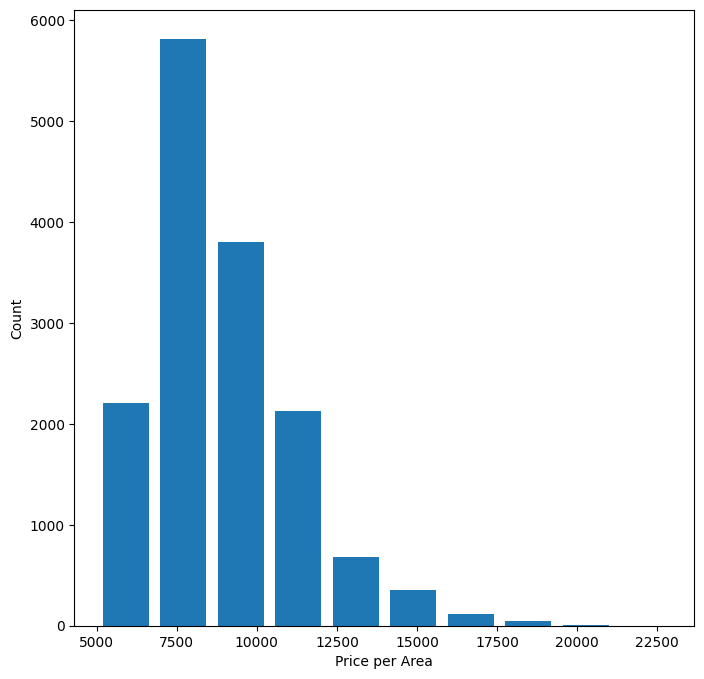

In [225]:
matplotlib.rcParams["figure.figsize"]=(8,8)
plt.hist(df10.Price_per_Area,rwidth=0.8)
plt.xlabel("Price per Area")
plt.ylabel("Count")

In [227]:
df10=df10.drop(['city','Price_per_Area'],axis="columns")
df10.shape

(15152, 6)

In [228]:
df10

,property_type,price,location,baths,bedrooms,Total_Area
25,House,15500000,Aabpara Coop Housing Society,4,3,2722.510
26,House,4700000,Aashiana Road,3,3,816.753
28,House,8500000,Aashiana Road,6,5,1361.255
35,House,2800000,Aashiana Road,2,1,544.502
36,House,8000000,Aashiana Road,3,3,1361.255
...,...,...,...,...,...,...
71898,House,25000000,Zubaida Park,4,5,2722.510
71899,House,30000000,Zubaida Park,4,4,5445.000
71900,House,4500000,Zubaida Park,3,3,544.502
71901,House,20000000,Zubaida Park,3,5,2722.510
